# Falso color (avanzado)
Convertir imágenes APT a color (composición 224)

In [1]:
#@markdown # Seleccionar Imagen
# path_raw_img = "./Files_decoded/img_rx_raw.png" # @param {type:"string"}

#Seleccionar canales A y B de la imagen
image_A = "./Files_decoded/img_rx_image_a.png"
image_B = "./Files_decoded/img_rx_image_b.png"

# Ruta de salida para la imagen png con falso color
out_path="./Files_Color/img_color2" # @param {type:"string"}

In [2]:
#@markdown # Configuración para el Falso Color Avanzado

ir_blend = "-noir" # No hacer mezcla Infrarrojos
# ir_blend = "-ir" # hacer mezcla Infrarrojos
# ir_blend = "-ir_night" # Mezcla Infrarrojos de noche
# ir_blend = "-sunset" # Mezcla Infrarrojos de día

In [3]:
# Realzar el color de la tierra en imágenes muy azules
enable_boost = False

In [4]:
from PIL import Image
import PIL.ImageOps
import matplotlib.pyplot as plt

In [5]:
# Carga las imágnes
ch2 = Image.open(image_A).convert("L")
ch4 = Image.open(image_B).convert("L")


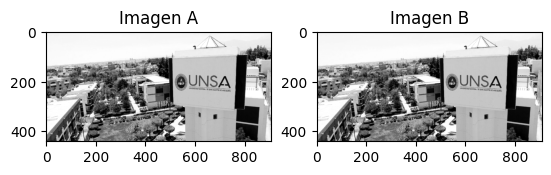

In [6]:
plt.figure()
plt.subplot(1,2,1)
plt.title("Imagen A")
plt.imshow(ch2,  cmap="gray")
plt.subplot(1,2,2)
plt.title("Imagen B")
plt.imshow(ch4, cmap="gray")

In [7]:
#ch4 = PIL.ImageOps.invert(ch4)
#ch4 = PIL.ImageOps.autocontrast(ch4)
ch2 = PIL.ImageOps.autocontrast(ch2)

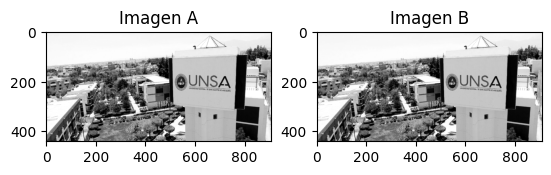

In [8]:
plt.figure()
plt.subplot(1,2,1)
plt.title("Imagen A")
plt.imshow(ch2,  cmap="gray")
plt.subplot(1,2,2)
plt.title("Imagen B")
plt.imshow(ch4, cmap="gray")

In [9]:
#@markdown # Variables
deyellowfactor = 100
black_pixels = []
ch2_blend = 1
ch4_blend = 200
ch2_boost = 1.5
ch4_boost = 0.5

In [10]:
# Carga las imágenes como arrays
ch2_array = ch2.load()
ch4_array = ch4.load()

# Tamaños
xsize,ysize = ch2.size

# Crea el archivo de imagen con falso Color
outimg = Image.new('RGB',(xsize,ysize))

In [11]:
# main loop
"""
for y in range(ysize):
    for x in range(xsize):
        
        ch4.putpixel((x,y),(ch2_array[x,y], ch2_array[x,y], int(1*ch4_array[x,y])))
"""
if ir_blend == "-ir":
    for y in range(ysize):
        for x in range(xsize):
            
            if ch2_array[x,y] - ch4_array[x,y] <= -50:
                outimg.putpixel((x,y),(
                    ch4_array[x,y],
                    ch4_array[x,y],
                    int(1*ch4_array[x,y])
                    )
                )
            else:
                outimg.putpixel((x,y),(
                    ch2_array[x,y],
                    ch2_array[x,y],
                    int(1*ch4_array[x,y])
                    )
                )

elif ir_blend == "-ir_night":
    for y in range(ysize):
        for x in range(xsize):
            if ch2_array[x,y] - ch4_array[x,y] <= -40:
                outimg.putpixel((x,y),(
                    round(ch2_array[x,y]*0.8 + ch4_array[x,y]*0.2),
                    round(ch2_array[x,y]*0.8 + ch4_array[x,y]*0.2),
                    round(ch2_array[x,y]*0.8 + ch4_array[x,y]*0.2)
                    )
                )
                #black_pixels.append([x,y])
            else:
                    outimg.putpixel((x,y),(
                        ch2_array[x,y],
                        ch2_array[x,y],
                        int(1*ch4_array[x,y])
                        )
                    )

elif ir_blend == "-sunset":
    for y in range(ysize):
        for x in range(xsize):

            if ch2_array[x,y] - ch4_array[x,y] <= -40:
                outimg.putpixel((x,y),(
                    round(ch2_array[x,y]*ch2_blend),
                    round(ch2_array[x,y]*ch2_blend),
                    round(ch4_array[x,y]*ch2_array[x,y]/ch4_blend)
                    )
                )
                #black_pixels.append([x,y])
            else:
                    outimg.putpixel((x,y),(
                        ch2_array[x,y],
                        ch2_array[x,y],
                        int(1*ch4_array[x,y])
                        )
                    )

else:
    for y in range(ysize):
        for x in range(xsize):
            outimg.putpixel((x,y),(
                ch2_array[x,y],
                ch2_array[x,y],
                int(1*ch4_array[x,y])
                )
            )

In [12]:
if enable_boost:
    outimg_array = outimg.load()
    for y in range(ysize):
        for x in range(xsize):
            outimg.putpixel((x,y),(
                round(outimg_array[x,y][0]*ch2_boost),
                round(outimg_array[x,y][1]*ch2_boost),
                round(outimg_array[x,y][2]*ch4_boost)
                )
            )          

In [13]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

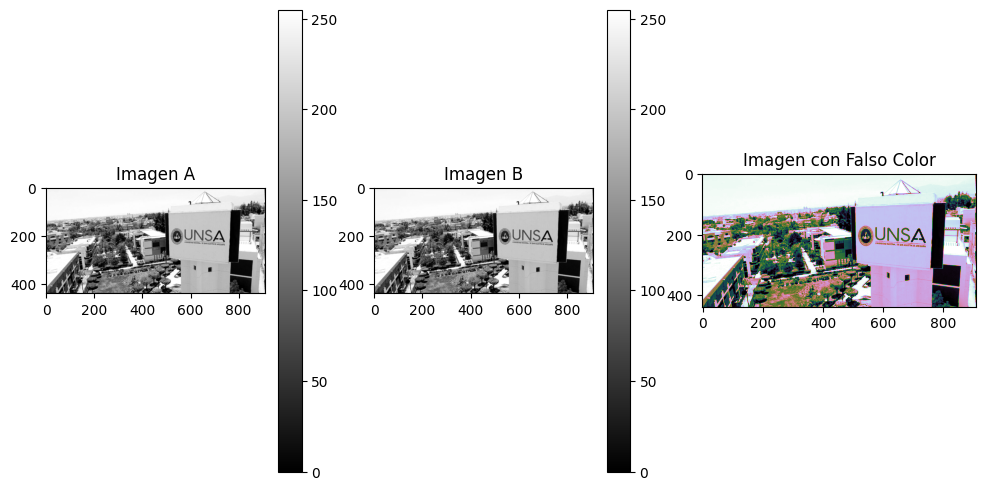

In [16]:
outimg = PIL.ImageOps.autocontrast(outimg)
# outimg = change_contrast(outimg,100)

plt.figure(figsize=[12,6])
plt.subplot(1,3,1)
plt.title("Imagen A")
plt.imshow(ch2,  cmap="gray")
plt.colorbar()
plt.subplot(1,3,2)
plt.title("Imagen B")
plt.imshow(ch4, cmap="gray")
plt.colorbar()
plt.subplot(1,3,3)
plt.title("Imagen con Falso Color")
plt.imshow(outimg)
# plt.colorbar()

outimg.save(f"{out_path}.png")